In [22]:
import numpy as np
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models

In [23]:
np.random.seed(20200504)
tf.random.set_seed(2020504)

データの作成
- t=0：感染していない
- t=1：感染している

In [24]:
# 正解ラベル t が 0のデータ
n0, mu0, variance0 = 20, [10, 11], 20
data0 = multivariate_normal(mu0, np.eye(2)*variance0, n0)
df0 = DataFrame(data0, columns=["x1", "x2"])
df0["t"] = 0

# 正解ラベルt が 1のデータ
n1, mu1, variance1 = 15, [18, 20], 22
data1 = multivariate_normal(mu1, np.eye(2)*variance1, n1)
df1 = DataFrame(data1, columns=["x1", "x2"])
df1["t"] = 1

# 正解ラベル0のデータと1のデータをくっつけて、行の順番をランダムにシャッフル
df = pd.concat([df0, df1], ignore_index=True)
train_set = df.reindex(permutation(df.index)).reset_index(drop=True)

In [25]:
train_x = train_set[["x1", "x2"]].values
train_t = train_set["t"].values

In [26]:
train_x

array([[24.62393022, 21.54217192],
       [ 7.4609554 , 21.17347887],
       [18.25757014, 24.98102524],
       [ 7.84580146, 10.33397879],
       [ 6.89418482,  9.9074356 ],
       [-5.17678851, 12.16579277],
       [ 9.68183271,  9.54602348],
       [17.81726146, 19.07836159],
       [20.02262396, 20.32027176],
       [23.98373709, 13.9016167 ],
       [21.57321811,  5.59438725],
       [ 5.77275446,  9.19951884],
       [ 0.55795748,  7.00716699],
       [17.94153424, 26.77886524],
       [14.02881335,  6.4184017 ],
       [ 3.87641902,  9.0539181 ],
       [16.8402645 , 15.97430067],
       [ 6.07794736, 14.65396461],
       [17.74657835,  9.25786854],
       [13.0230664 , 14.49674795],
       [12.85117909, 20.48381963],
       [17.11467698, 17.79661476],
       [ 4.53341454, 14.22831918],
       [10.82260172, 13.36956518],
       [ 9.88746226, 11.546411  ],
       [ 5.55457017, 14.01606177],
       [13.72254715, 11.47085806],
       [13.95195448,  6.14304312],
       [14.20304485,

In [27]:
train_t

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0])

In [40]:
model = models.Sequential()
model.add(layers.Dense(1, activation='sigmoid', input_shape=(2,),
                       name='logistic_regression'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
logistic_regression (Dense)  (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(optimizer="adam", \
             loss="binary_crossentropy", \
             metrics=["acc"])

In [42]:
history = model.fit(train_x, train_t, \
                   batch_size=len(train_x), epochs=5000, verbose=0)

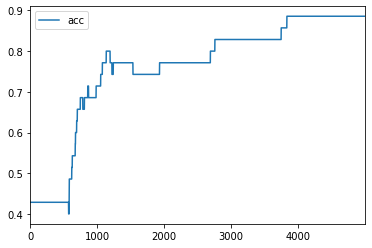

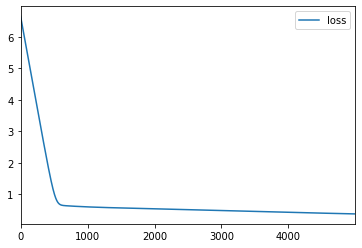

In [43]:
DataFrame({"acc": history.history["acc"]}).plot()
DataFrame({"loss": history.history["loss"]}).plot()

In [44]:
model.get_weights()

[array([[0.13364324],
        [0.09317703]], dtype=float32), array([-3.044204], dtype=float32)]

In [46]:
[[w1], [w2]], [b] = model.get_weights()

In [47]:
train_set0 = train_set[train_set["t"]==0]
train_set1 = train_set[train_set["t"]==1]

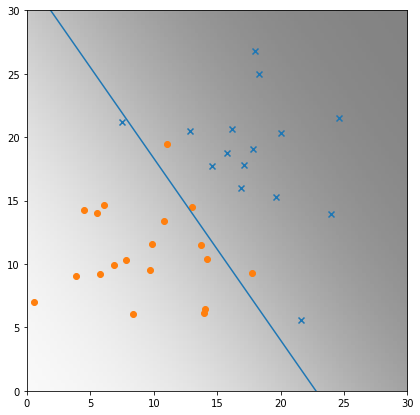

In [49]:
fig = plt.figure(figsize=(7, 7))
subplot = fig.add_subplot(1, 1, 1)
subplot.set_ylim([0, 30])
subplot.set_xlim([0, 30])
subplot.scatter(train_set1.x1, train_set1.x2, marker="x")
subplot.scatter(train_set0.x1, train_set0.x2, marker="o")

xs = np.linspace(0, 30, 10)
ys = - (w1*xs/w2 + b/w2)
subplot.plot(xs, ys)

field = [[(1 / (1 + np.exp(-(w1*x1 + w2*x2 + b))))
         for x1 in np.linspace(0, 30, 100)]
        for x2 in np.linspace(0, 30, 100)]
subplot.imshow(field, origin="lower", extent=(0, 30, 0, 30),
              vmin=0, vmax=1, cmap=plt.cm.gray_r, alpha=0.5)

In [50]:
n0, mu0, variance0 = 800, [10, 11], 20
data0 = multivariate_normal(mu0, np.eye(2)*variance0 ,n0)
df0 = DataFrame(data0, columns=['x1', 'x2'])
df0['t'] = 0

n1, mu1, variance1 = 600, [18, 20], 22
data1 = multivariate_normal(mu1, np.eye(2)*variance1 ,n1)
df1 = DataFrame(data1, columns=['x1', 'x2'])
df1['t'] = 1

df = pd.concat([df0, df1], ignore_index=True)
df = df.reindex(permutation(df.index)).reset_index(drop=True)

num_data = int(len(df)*0.8)
train_set = df[:num_data]
test_set = df[num_data:]

In [51]:
train_x = train_set[['x1', 'x2']].values
train_t = train_set['t'].values
test_x = test_set[['x1', 'x2']].values
test_t = test_set['t'].values

In [52]:
model = models.Sequential()
model.add(layers.Dense(1, activation='sigmoid', input_shape=(2,),
                       name='logistic_regression'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
logistic_regression (Dense)  (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['acc'])

In [54]:
history = model.fit(train_x, train_t,
                    validation_data=(test_x, test_t),
                    batch_size=len(train_x), epochs=10)

Train on 1120 samples, validate on 280 samples
Epoch 1/10
1120/1120 [==============================] - 0s 327us/sample - loss: 4.8421 - acc: 0.4420 - val_loss: 4.9108 - val_acc: 0.4821
Epoch 2/10
1120/1120 [==============================] - 0s 8us/sample - loss: 4.8300 - acc: 0.4437 - val_loss: 4.8990 - val_acc: 0.4821
Epoch 3/10
1120/1120 [==============================] - 0s 9us/sample - loss: 4.8178 - acc: 0.4437 - val_loss: 4.8871 - val_acc: 0.4821
Epoch 4/10
1120/1120 [==============================] - 0s 9us/sample - loss: 4.8056 - acc: 0.4437 - val_loss: 4.8753 - val_acc: 0.4821
Epoch 5/10
1120/1120 [==============================] - 0s 10us/sample - loss: 4.7935 - acc: 0.4446 - val_loss: 4.8634 - val_acc: 0.4821
Epoch 6/10
1120/1120 [==============================] - 0s 11us/sample - loss: 4.7813 - acc: 0.4446 - val_loss: 4.8516 - val_acc: 0.4821
Epoch 7/10
1120/1120 [==============================] - 0s 11us/sample - loss: 4.7692 - acc: 0.4446 - val_loss: 4.8397 - val_acc: 0.4

In [55]:
history = model.fit(train_x, train_t,
                    validation_data=(test_x, test_t),
                    batch_size=len(train_x), epochs=5000, verbose=0)

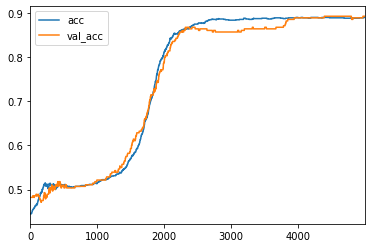

In [56]:
DataFrame({'acc': history.history['acc'], 
           'val_acc': history.history['val_acc']}).plot()